In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

species = pd.read_csv('C:/Users/mtracy/OneDrive/Thinkful/data_files/national_parks/species.csv')

c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. Choose one variable and plot that variable four different ways.

Dataset is biodiversity in US National Parks.  From kaggle.com <br>
https://www.kaggle.com/nationalparkservice/park-biodiversity

In [2]:
#Count number of species per park
count = species['Common Names'].groupby(species['Park Name']).count()

#Sort by count, descending order
count = count.sort_values(ascending=False)

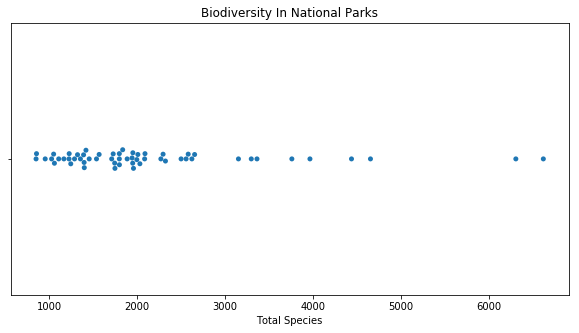

In [3]:
#Swarm Plot
plt.figure(figsize=(10,5))
sns.swarmplot(count, orient="hv")
plt.xlabel("Total Species")
plt.title("Biodiversity In National Parks")
plt.show()

Pros: Simple plot showing full spread of data.  Outliers are visible. Central tendency visually indicated by clustering.<br>
Cons:  No statistical insights, nor information on specific parks.

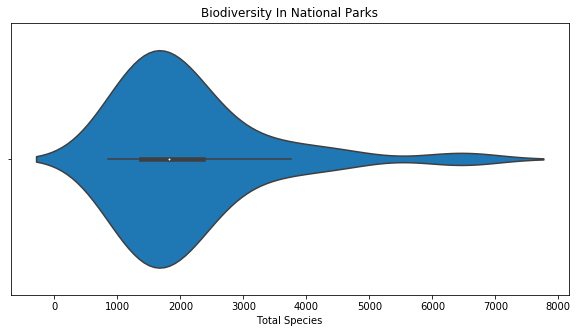

In [4]:
#Violin Plot
plt.figure(figsize=(10,5))
sns.violinplot(x=count, bw='silverman', saturation=1)
plt.xlabel("Total Species")
plt.title("Biodiversity In National Parks")
plt.show()

Pros: Gives insights into distribution of data, including central tendency and outliers.<br>
Cons:  Data points hard to identify, no information on specific parks.

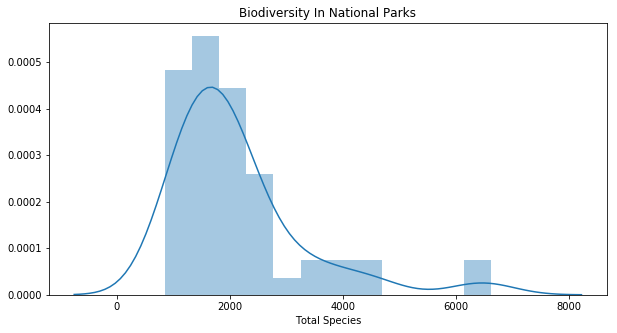

In [5]:
#Distribution Plot
plt.figure(figsize=(10,5))
plt.title("Biodiversity In National Parks")
sns.distplot(count, axlabel='Total Species')
plt.show()

Pros: Gives statistiscal insights - central tendency - in a clearer way than violin plot.  Outliers clearly visible.<br>
Cons:  No information on specific parks.  Y-axis meaning unclear/not intuitive.  No information on sample size since bin count not shown.

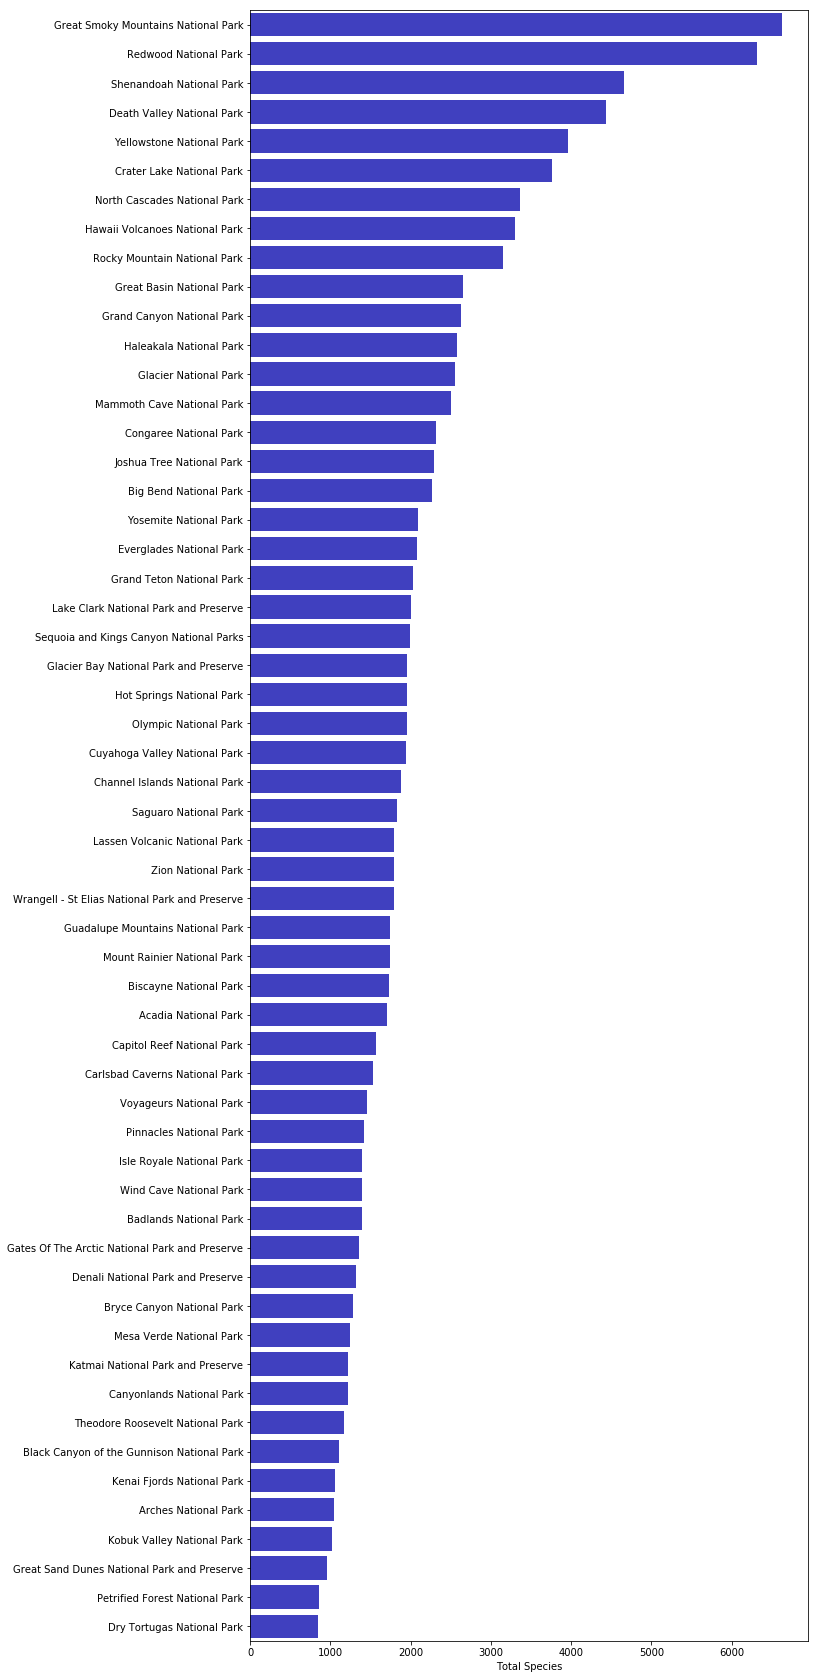

In [6]:
#Bar plot
parks = count.index.tolist()
count_list = count.tolist()

plt.figure(figsize=(10,30))
sns.barplot(y=parks, x=count_list, color='b', saturation=0.5)
plt.xlabel('Total Species')
plt.show()

Pros: Allows comparison (mostly qualitative) between specific parks. Park names bring additional insights compared to plots above.<br>
Cons:  No insights on central tendency.  Lots of data = long plot requiring scrolling.  

## 2. Choose two continuous variables and plot them three different ways.

In [7]:
#Import SQL merged data
size = pd.read_csv('C:/Users/mtracy/OneDrive/Thinkful/data_files/national_parks/merge.tsv', sep='\t')

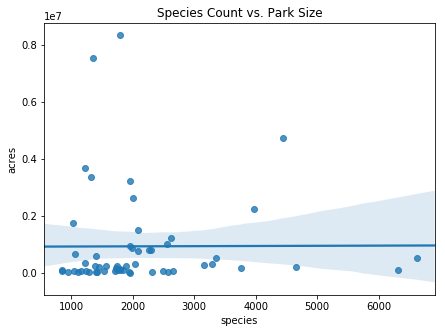

In [8]:
#Regression plot 
plt.figure(figsize=(7,5))
plt.title('Species Count vs. Park Size')
sns.regplot(x=size.species, y=size.acres, fit_reg=True)
plt.show()

Pros: Shows correlation between two variables.  (None in this case)<br>
Cons:  Only shows relationship between two variables, provides no insights into characteristics of each variable.

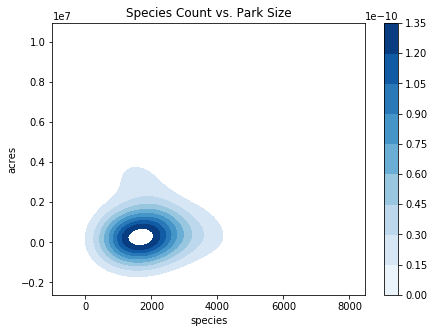

In [9]:
#KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(size.species, size.acres, shade=True, shade_lowest=False, cmap="Blues", cbar=True)
plt.title('Species Count vs. Park Size')
plt.show()

Pros: Looks neat. <br>
Cons:  Hard to understand meaning in this partiular instance, conclusions are not at all intuitive.  Negative acreage makes no sense.  

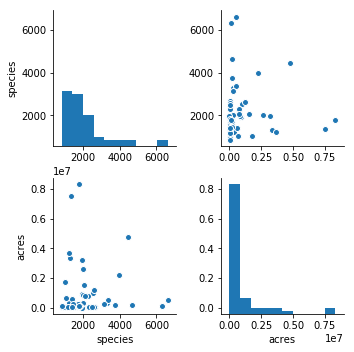

In [10]:
#Pair Grid - Scatter plots for joint relationships and histograms
sns.pairplot(size)
plt.show()

Pros: Shows both correlation between variables and distribution within each individual variable.<br>
Cons:  Scatter plots are redundant.

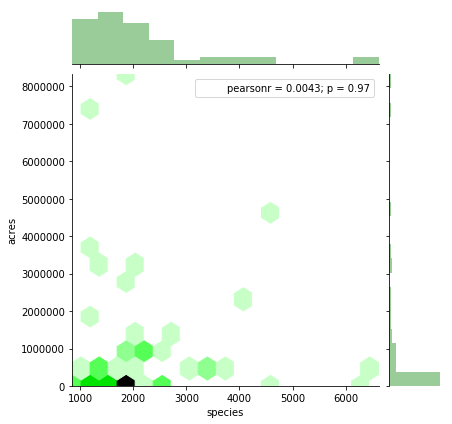

In [11]:
#Hexbin plot (extra)
sns.jointplot(x=size.species, y=size.acres, kind="hex", color='g');

Pros: Looks neat.  Shows relationship between variables and distribution within each individual variable.<br>
Cons:  Distribution in individual variables is largely qualitative.  Relationship between variables not intuitve if you're unfamiliar with this type of plot.

## 3. Choose one continuous variable and one categorical variable, and plot them six different ways.

In [39]:
#Look at Park size (continuous) by states (categorical) with more than 2 parks.

#count instances per state
counts = size.groupby(size['State']).count()

#select states with more than 2 parks
multiples = counts[counts['ParkName'] > 2]

#send state names to list to use in figures
multiples_list = multiples.index.tolist()

#Select rows from size where state name is in multiples list
data = size[size['State'].isin(multiples_list) == True]

#Check data to make sure it's doing what we want
data.head()

###Old code --> code above makes the code below more efficient and so that states aren't 'hard coded'
#Setup variables
#AK = size[size['State'] == 'AK']
#AZ = size[size['State'] == 'AZ']
#CA = size[size['State'] == 'CA']
#CO = size[size['State'] == 'CO']
#FL = size[size['State'] == 'FL']
#UT = size[size['State'] == 'UT']
#WA = size[size['State'] == 'WA']

#data = [AK.acres, AZ.acres, CA.acres, CO.acres, FL.acres, UT.acres, WA.acres]
#states = ['AK', 'AZ', 'CA', 'CO', 'FL', 'UT', 'WA']

,ParkName,State,species,acres
1,Arches National Park,UT,1048,76519
4,Biscayne National Park,FL,1726,172924
5,Black Canyon of the Gunnison National Park,CO,1106,32950
6,Bryce Canyon National Park,UT,1286,35835
7,Canyonlands National Park,UT,1223,337598


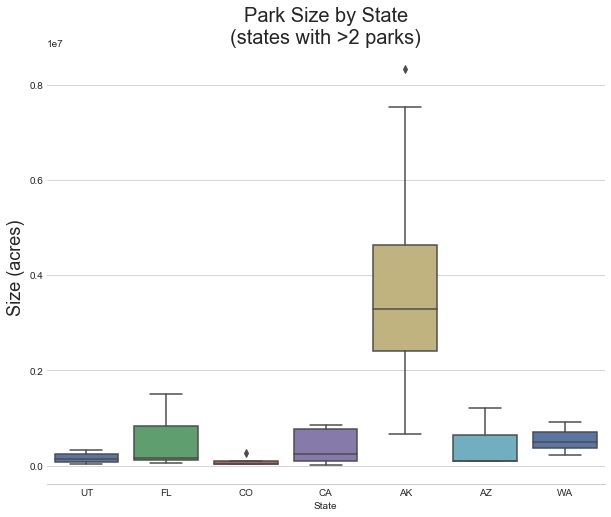

In [36]:
#Boxplot
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')

sns.boxplot(x=data['State'], y=data['acres'], palette='deep')
sns.despine(left=True)
plt.ylabel('Size (acres)', fontsize=18)
plt.title('Park Size by State\n(states with >2 parks)', fontsize=20)
plt.show()

Pros: Shows distribution of data for each state.<br>
Cons:  Can be too much statistical information if you're looking for a simple plot.  Doesn't indicate number of parks for each state.

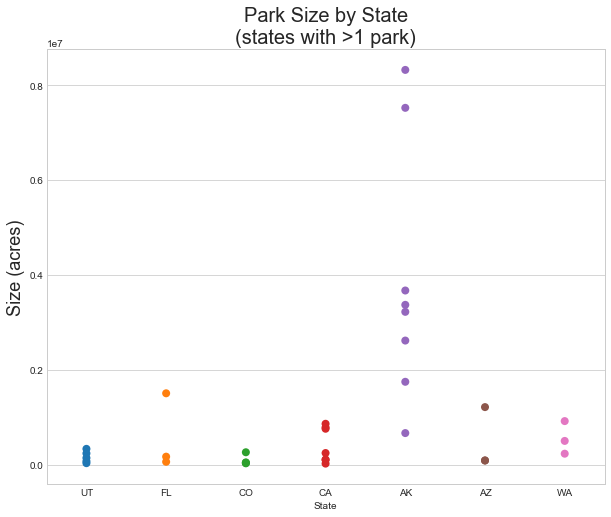

In [38]:
#Stripplot
plt.figure(figsize=(10, 8))
sns.stripplot(x=data['State'], y=data['acres'], size=8)
plt.ylabel('Size (acres)', fontsize=18)
plt.title('Park Size by State\n(states with >1 park)', fontsize=20)
plt.show()

Pros: Shows range of data for each state, along with number of parks per state. Simple yet informative.<br>
Cons:  Minimal statistical insights. Data points overlap.

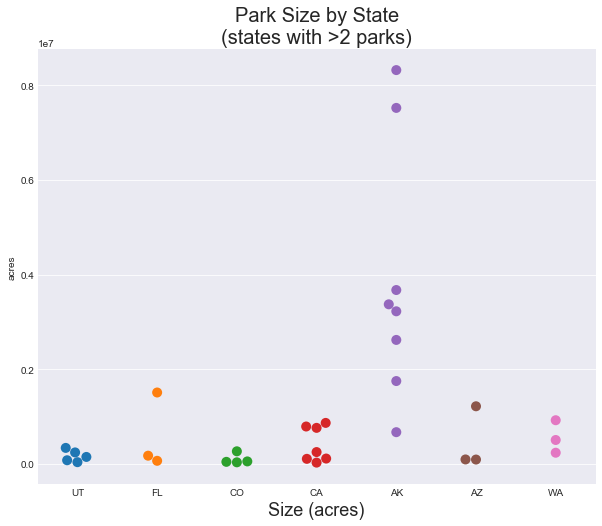

In [46]:
#Swarmplot
plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
sns.swarmplot(x=data['State'], y=data['acres'], size=10)
plt.xlabel('Size (acres)', fontsize=18)
plt.title('Park Size by State\n(states with >2 parks)', fontsize=20)
plt.show()

Pros: Similar to stripplot but no data overlap.  Shows range of data for each state, along with number of parks per state. Simple yet informative.<br>
Cons:  Minimal statistical insights.

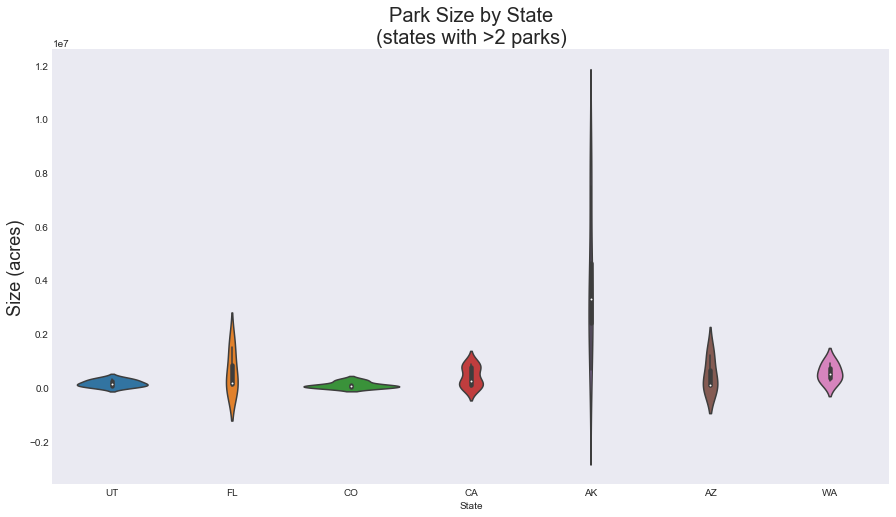

In [47]:
#violin Plot
plt.figure(figsize=(15, 8))
sns.set_style('dark')
sns.violinplot(x=data['State'], y=data['acres'])
plt.ylabel('Size (acres)', fontsize=18)
plt.title('Park Size by State\n(states with >2 parks)', fontsize=20)
plt.show()

Pros: Looks neat, provides some degree of statistical insight.<br>
Cons:  Not overly intuitive insight since the plot style isn't commonly used.  Doesn't appear to work well with data having a large range.  No information on number of parks per state.

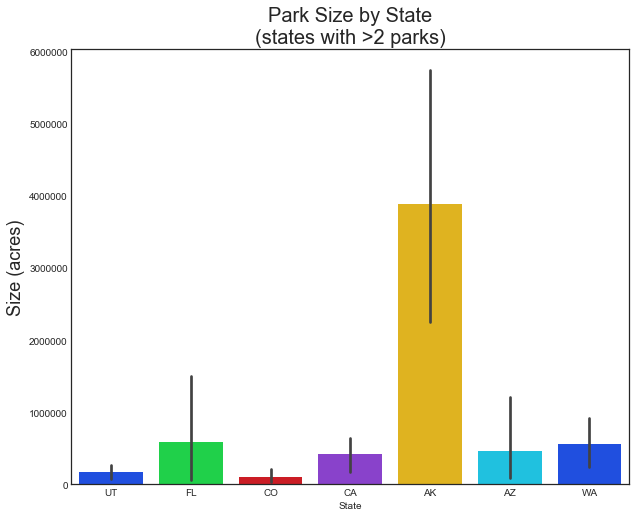

In [49]:
#Bar plot
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.barplot(x=data['State'], y=data['acres'], palette='bright')
plt.ylabel('Size (acres)', fontsize=18)
plt.title('Park Size by State\n(states with >2 parks)', fontsize=20)
plt.show()

Pros: Simple and informative.  Easy to interpret with statistical insight.<br>
Cons:  Doesn't give any information on the number of parks per state.  Filled in bar area below the minimum value could be misleading.

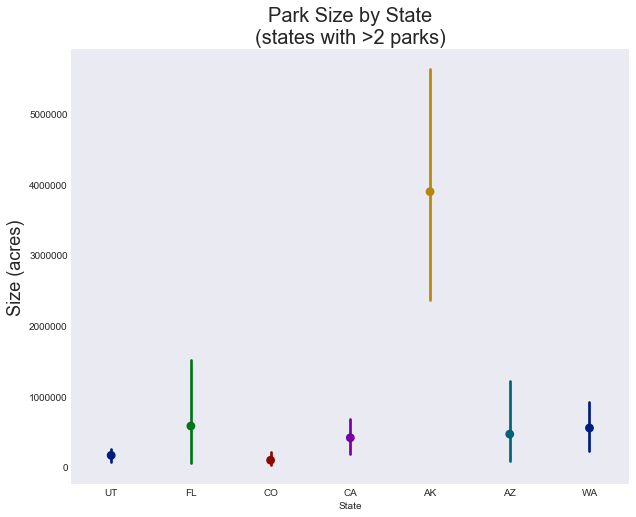

In [51]:
plt.figure(figsize=(10, 8))
sns.set_style('dark')
sns.pointplot(x=data['State'], y=data['acres'], palette='dark')
plt.ylabel('Size (acres)', fontsize=18)
plt.title('Park Size by State\n(states with >2 parks)', fontsize=20)
plt.show()

Pros: Simple and informative.  Easy to interpret with statistical insight.  Solves issue of filled bar area below minimum value discussed above.<br>
Cons:  Doesn't give any information on the number of parks per state. 

## Challenge: 4+ continuous variables, 1+ categorical.  Make master plot showing relationships.

In [34]:
#import iris data
orig = pd.read_csv('C:/Users/mtracy/OneDrive/Thinkful/data_files/Iris.csv')

#remove id column so it's not plotted up with the real data
iris = orig.drop(columns='Id')
iris.head()

#how to incorporate species into master plot?

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


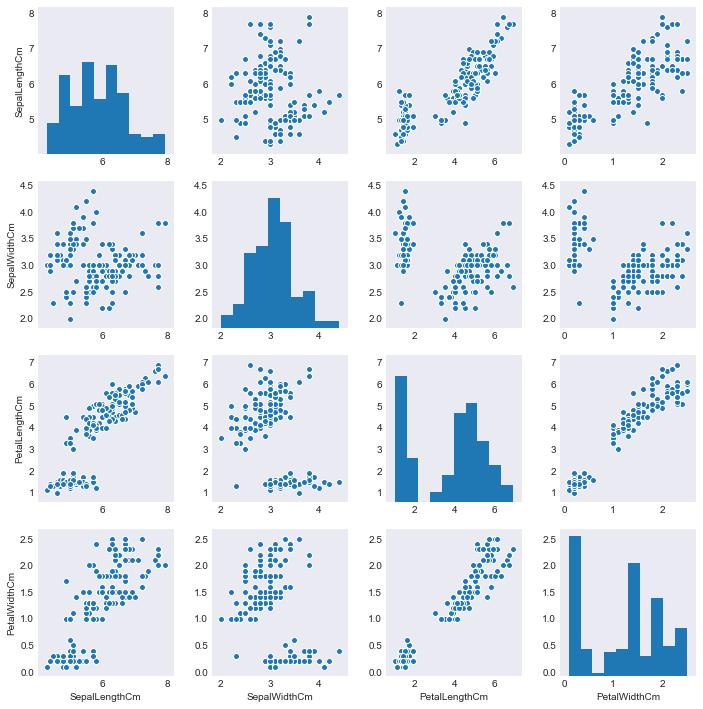

In [32]:
sns.pairplot(drop)
plt.show()